In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import locale
#librerias epscializadas
from statsmodels.tsa.api import seasonal_decompose

In [ ]:
Metro=pd.read_excel("MetroM.xlsx",header=1)

In [ ]:
col=Metro.columns.drop('Mes')
Metro=Metro.replace('-',0)
Metro[col]=Metro[col].astype('float')
Metro["Año"] = Metro["Año"].fillna(0).astype(int)

In [ ]:
Metro.to_excel("MetroM1.xlsx")

In [ ]:
# Diccionario español -> inglés
meses = {
    "Enero": "January", "Febrero": "February", "Marzo": "March",
    "Abril": "April", "Mayo": "May", "Junio": "June",
    "Julio": "July", "Agosto": "August", "Septiembre": "September",
    "Octubre": "October", "Noviembre": "November", "Diciembre": "December"
}

# Reemplazar los nombres de los meses
Metro["Mes_en"] = Metro["Mes"].replace(meses).astype(str)

# Combinar y convertir a fecha
Metro["Fecha"] = pd.to_datetime(Metro["Mes_en"].astype(str) + " " + Metro["Año"].astype(str),
                                format="%B %Y", errors="coerce")

In [ ]:
Metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Año                                            366 non-null    int64         
 1   Mes                                            366 non-null    object        
 2   Longitud en servicio (Kilómetros)              366 non-null    float64       
 3   Trenes en servicio (Número de unidades)        366 non-null    float64       
 4   Kilómetros recorridos (Miles de kilómetros)    366 non-null    float64       
 5   Pasajeros transportados (Miles de  pasajeros)  366 non-null    float64       
 6   Ingresos por pasaje (Miles de pesos)           366 non-null    float64       
 7   Energía eléctrica consumida (Miles de KWH)     366 non-null    float64       
 8   Mes_en                                         366 non-null 

In [ ]:
Metro.tail()

,Año,Mes,Longitud en servicio (Kilómetros),Trenes en servicio (Número de unidades),Kilómetros recorridos (Miles de kilómetros),Pasajeros transportados (Miles de pasajeros),Ingresos por pasaje (Miles de pesos),Energía eléctrica consumida (Miles de KWH),Mes_en,Fecha
361,2025,Febrero,40.0,69.0,924.1,8153.1,64.0,3382.1,February,2025-02-01
362,2025,Marzo,40.0,69.0,948.5,8941.8,69.9,3822.6,March,2025-03-01
363,2025,Abril,40.0,71.0,977.8,7898.2,61.0,3800.9,April,2025-04-01
364,2025,Mayo,40.0,72.0,1055.2,8207.5,64.1,4350.2,May,2025-05-01
365,2025,Junio,40.0,72.0,926.4,7096.2,428.0,4387.2,June,2025-06-01


In [ ]:
Metro.describe()

,Año,Longitud en servicio (Kilómetros),Trenes en servicio (Número de unidades),Kilómetros recorridos (Miles de kilómetros),Pasajeros transportados (Miles de pasajeros),Ingresos por pasaje (Miles de pesos),Energía eléctrica consumida (Miles de KWH),Fecha
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366
mean,2009.754098,29.204918,36.333333,642.210656,6468.360109,21514.830055,2958.211475,2010-03-17 06:29:30.491803392
min,1995.000000,23.000000,19.000000,199.000000,1959.200000,35.500000,1584.000000,1995-01-01 00:00:00
25%,2002.000000,23.250000,34.250000,261.250000,3898.000000,8744.000000,2384.750000,2002-08-08 18:00:00
50%,2010.000000,31.000000,40.000000,762.000000,5552.000000,18512.000000,3029.500000,2010-03-16 12:00:00
75%,2017.000000,32.000000,40.000000,851.875000,7098.000000,33735.300000,3512.250000,2017-10-24 06:00:00
max,2025.000000,40.000000,72.000000,1055.200000,16215.200000,76691.400000,4387.200000,2025-06-01 00:00:00
std,8.819013,5.703551,11.061390,274.027726,3614.273027,14691.115022,654.828737,NaN


In [ ]:
Metro=Metro.set_index("Fecha")

In [ ]:
Metro.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=366, freq=None)

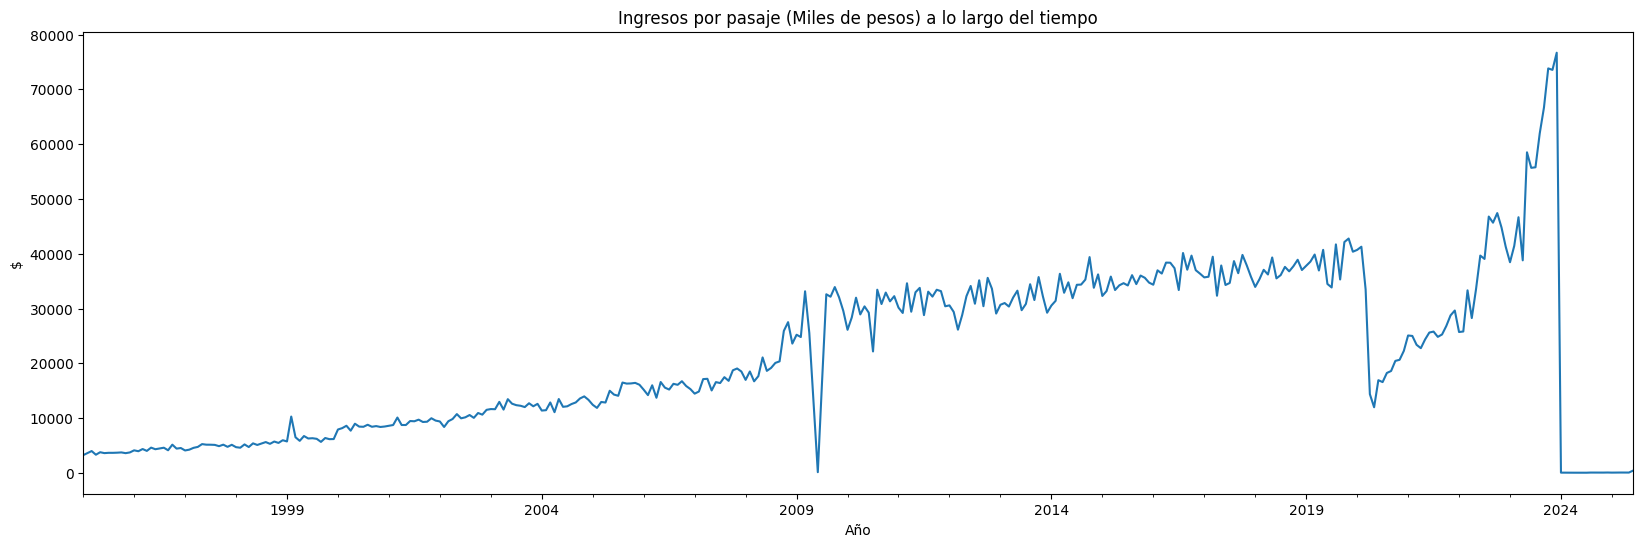

In [ ]:
Metro['Ingresos por pasaje (Miles de pesos)'].plot(figsize=(20,6))
plt.xlabel('Año')
plt.ylabel('$')
plt.title('Ingresos por pasaje (Miles de pesos) a lo largo del tiempo')
plt.show()

A partir de Junio del 2022 se inicio el aumento

1.   En el año de mayo y junio del 2009 el gobierno ofrecio de manera gratuita el sistema de Metrorrey por decreto del estado

2.   En el año 2020 paso la pandemia del COVID19 lo que significo en una dismución de casi el 60% de los ingresos

In [ ]:
Metro.index.freq='MS'

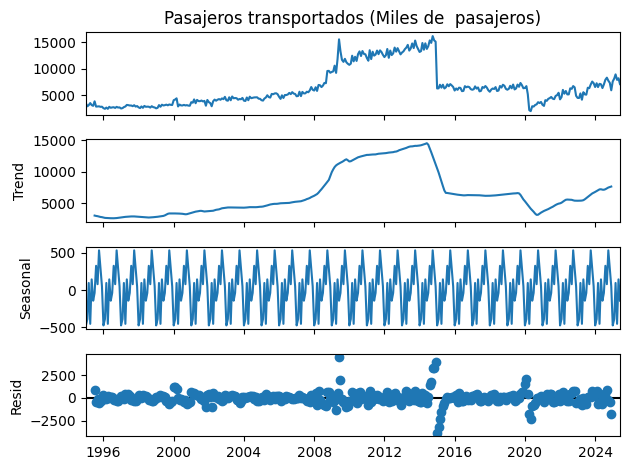

In [ ]:
serie1=seasonal_decompose(Metro['Pasajeros transportados (Miles de  pasajeros)'].ffill(),model='ad', period=12)
serie1.plot()
plt.show()
# Trend is actually the cycle trend

In [ ]:
#vamos a ver el componente estacional
Serie=serie1.seasonal.iloc[:]
#cuanod hay positivo hay mas pasajeros de lo normal

In [ ]:
Serie.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 366 entries, 1995-01-01 to 2025-06-01
Freq: MS
Series name: seasonal
Non-Null Count  Dtype  
--------------  -----  
366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
